<a href="https://colab.research.google.com/github/aduphad11/My-projects/blob/master/covid_symptoms_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COVID Pre Conditions Analysis**

**Table of content**

Introduction

Packages and Data

Preprocessing
1. Analysis of symptoms, entry and death dates
2. Analysis of Covid Results across gender
3. Analysis of age across age-frequency, gender

#Introduction

Persons with underlying health conditions or other recognized risk factors for severe outcomes from respiratory infections appear to be at a higher risk for severe disease from COVID-19 than are persons without these condition.

https://www.forbes.com/sites/victoriaforster/2020/03/31/people-with-underlying-health-conditions-are-at-risk-of-more-severe-covid-19new-cdc-report/#251f3ec27462

#Packages and Data

In [8]:
import numpy as np
import pandas as pd

In [9]:
from google.colab import files
uploaded = files.upload()

Saving datasets_785492_1361825_Catalogs.xlsx to datasets_785492_1361825_Catalogs (1).xlsx


In [10]:
import os
for dirname, _, filenames in os.walk('datasets_785492_1361825_Catalogs.xlsx'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [11]:
import datetime

In [12]:
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px

In [13]:
import seaborn as sns
from matplotlib import rcParams
import plotly.graph_objects as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [14]:
import matplotlib.pyplot as plt

In [16]:
from google.colab import files
uploaded = files.upload()

Saving covid.csv to covid (1).csv


In [17]:
import io
df = pd.read_csv(io.BytesIO(uploaded['covid.csv']))
# Dataset is now stored in a Pandas Dataframe

In [18]:
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
mean,1.506726,1.215165,76.562952,1.846262,42.622483,50.400692,2.210633,2.280221,2.265029,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864
std,0.499955,0.410937,39.058676,0.560939,16.659973,47.501579,5.683523,5.327832,5.334658,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000


In [19]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


**Preprocessing**

In [20]:
df = pd.read_csv("covid.csv", parse_dates=['entry_date','date_symptoms'], dayfirst=True)
df

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,2020-05-04,2020-05-02,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,2020-03-19,2020-03-17,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,2020-04-06,2020-04-01,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,2020-04-17,2020-04-10,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,2020-04-13,2020-04-13,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,01ff60,2,1,2020-05-13,2020-05-03,9999-99-99,97,2,58,97,1,2,2,2,2,2,2,2,2,2,2,3,97
566598,047cd1,1,1,2020-04-07,2020-04-06,9999-99-99,97,2,48,2,2,2,2,2,2,2,2,2,2,2,2,3,97
566599,1beb81,1,2,2020-05-14,2020-05-01,9999-99-99,2,1,49,2,2,2,2,2,2,2,2,1,2,2,99,3,2
566600,16fb02,1,1,2020-05-31,2020-05-29,9999-99-99,97,1,43,2,2,2,2,2,2,2,2,2,2,2,2,3,97


In [21]:
no_icu_data_bool = df['icu'].isin([97, 98, 99])
no_icu_data_bool

icu_data = df[~ no_icu_data_bool]
no_icu_data = df[no_icu_data_bool]
print("{} rows have ICU details ".format(icu_data.shape[0]))
print("Only {}% of given data has ICU details ".format(round((icu_data.shape[0]/ no_icu_data.shape[0])*100)))

121788 rows have ICU details 
Only 27% of given data has ICU details 


In [22]:
icu_data.sex.replace({1: 'Female', 2: 'Male'}, inplace=True)
icu_data.patient_type.replace({1: 'Outpatient', 2: 'Inpatient'}, inplace=True)
icu_data.intubed.replace({1: 'Yes', 2: 'No',97:'Not Specified', 98:'Not Specified',99:'Not Specified'}, inplace=True)
icu_data.pneumonia.replace({1: 'Yes', 2: 'No', 98:'Not Specified',99:'Not Specified', 97:'Not Specified'}, inplace=True)
icu_data.pregnancy.replace({1: 'Yes', 2: 'No', 99:'Not Specified',98:'Not Specified', 97:'Not Specified'}, inplace=True)
icu_data.diabetes.replace({1: 'Yes', 2: 'No', 97:'Not Specified',98:'Not Specified',99:'Not Specified'}, inplace=True)
icu_data.copd.replace({1: 'Yes', 2: 'No', 97:'Not Specified',98:'Not Specified', 99:'Not Specified'}, inplace=True)
icu_data.asthma.replace({1: 'Yes', 2: 'No', 99:'Not Specified',97:'Not Specified',98:'Not Specified'}, inplace=True)
icu_data.inmsupr.replace({1: 'Yes', 2: 'No', 97:'Not Specified',98:'Not Specified',99:'Not Specified'}, inplace=True)
icu_data.hypertension.replace({1: 'Yes', 2: 'No', 99:'Not Specified',97:'Not Specified',98:'Not Specified'}, inplace=True)
icu_data.other_disease.replace({1: 'Yes', 2: 'No', 97:'Not Specified',99:'Not Specified',98:'Not Specified'}, inplace=True)
icu_data.cardiovascular.replace({1: 'Yes', 2: 'No', 99:'Not Specified',97:'Not Specified',98:'Not Specified'}, inplace=True)
icu_data.obesity.replace({1: 'Yes', 2: 'No', 97:'Not Specified',98:'Not Specified',99:'Not Specified'}, inplace=True)
icu_data.renal_chronic.replace({1: 'Yes', 2: 'No', 97:'Not Specified',99:'Not Specified',98:'Not Specified'}, inplace=True)
icu_data.tobacco.replace({1: 'Yes', 2: 'No', 97:'Not Specified',99:'Not Specified',98:'Not Specified'}, inplace=True)
icu_data.contact_other_covid.replace({1: 'Yes', 2: 'No', 97:'Not Specified',99:'Not Specified',98:'Not Specified'}, inplace=True)
icu_data.covid_res.replace({1: 'Positive', 2: 'Negative', 3:'Awaiting Results'}, inplace=True)
icu_data.icu.replace({1: 'Yes', 2: 'No', 97:'Not Specified',98:'Not Specified', 99:'Not Specified'}, inplace=True)

icu_yes = icu_data[icu_data['icu'] == "Yes"]
icu_no = icu_data[icu_data['icu'] != "Yes"]
print("In Patients requiring ICU = {} and not requiring ICU = {} ".format(icu_yes.shape[0],icu_no.shape[0]))
icu_yes.date_died = icu_yes.date_died.replace("9999-99-99",datetime.datetime(1900,1,1))
icu_yes.date_died = pd.to_datetime(icu_yes.date_died, dayfirst=True, errors='coerce')
icu_yes['died'] = np.where(icu_yes['date_died'] == datetime.datetime(1900,1,1),False,True)
icu_yes['entry_symptoms_dates'] = ((icu_yes['entry_date'] - icu_yes['date_symptoms'])/ np.timedelta64(1, 'D')).astype(int)
icu_yes['died_entry_dates'] = ((icu_yes['date_died'] - icu_yes['entry_date'])/ np.timedelta64(1, 'D')).astype(int)
icu_yes['died_symptoms_dates'] = ((icu_yes['date_died'] - icu_yes['date_symptoms'])/ np.timedelta64(1, 'D')).astype(int)
icu_yes['age_freq']=np.where((icu_yes['age'] < 2),'<2',np.where((icu_yes['age'] >= 2) & (icu_yes['age'] <= 12) ,'2-12',np.where((icu_yes['age'] >= 13) & (icu_yes['age'] < 18) ,'13-17',np.where(icu_yes['age']<18,'<18',np.where((icu_yes['age']>17)&(icu_yes['age']<=30),'18-30',
np.where((icu_yes['age']>30)&(icu_yes['age']<=50),'31-50',np.where(icu_yes['age']>70,'70+',
np.where((icu_yes['age']>50)&(icu_yes['age']<=70),'51-70',"Not Specified"))))))))

icu_yes.head(4)

In Patients requiring ICU = 10112 and not requiring ICU = 111676 


,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,died,entry_symptoms_dates,died_entry_dates,died_symptoms_dates,age_freq
5,1beec8,Male,Inpatient,2020-04-16,2020-04-16,2020-04-29,No,Yes,47,Not Specified,Yes,No,No,No,No,No,No,No,No,No,Not Specified,Positive,Yes,True,0,13,13,31-50
92,077c96,Male,Inpatient,2020-04-30,2020-04-30,2020-05-15,Yes,Yes,66,Not Specified,No,No,No,No,No,No,No,No,No,No,Not Specified,Positive,Yes,True,0,15,15,51-70
123,0046aa,Male,Inpatient,2020-04-22,2020-04-22,2020-05-03,No,Yes,58,Not Specified,Yes,No,No,No,No,Yes,No,No,No,No,Not Specified,Positive,Yes,True,0,11,11,51-70
134,1d8440,Female,Inpatient,2020-04-14,2020-04-14,1900-01-01,No,Yes,31,No,No,No,No,No,No,No,No,No,No,No,Not Specified,Positive,Yes,False,0,-43933,-43933,31-50


#Lung related Infections

As per article - https://coronavirusexplained.ukri.org/en/article/cad0012/

The most important consequence of severe COVID-19 is a reduction in the lung’s ability to transfer oxygen from the air into the blood – leading to low blood oxygen levels (hypoxia). Supportive treatment in hospital is therefore mainly to increase blood oxygen.

Pneumonia The lungs resemble a sponge with each hole representing an air sac (alveolus) and material delicately holding the air sacs and the blood vessels together. The virus enters the lungs in droplets and infects cells lining the air sacs where it multiplies. This directly damages those cells, but also triggers a response from the immune cells nearby, which is called inflammation. Fluid collects in the lung tissue causing pneumonia. This impairs the transfer of oxygen between air sacs and blood, often causing the patient to experience shortness of breath as the body tries to compensate for the inefficient gas transfer by breathing faster.

Intubation is a procedure that's used when you can't breathe on your own. Your doctor puts a tube down your throat and into your windpipe to make it easier to get air into and out of your lungs. A machine called a ventilator pumps in air with extra oxygen. Then it helps you breathe out air that’s full of carbon dioxide (CO2). This is called mechanical ventilation. It helps keep your oxygen and CO2 at healthy levels.

Asthma and COVID https://www.cdc.gov/coronavirus/2019-ncov/need-extra-precautions/asthma.html

People with moderate to severe asthma may be at higher risk of getting very sick from COVID-19. COVID-19 can affect your respiratory tract (nose, throat, lungs), cause an asthma attack, and possibly lead to pneumonia and acute respiratory disease.

Points to Note:

* Task of the NB is to find how many cases may need ICU or per how many inpatients can we expect a demand for ICU.

* In the given data, only 121788 rows (Only 27% of given data) have ICU details - so we will take up these only

* ICU patients are inpatients

* Out of 121788 patients only 10112 needed ICU. (Around 8.3%)

* We will look at what kind of health conditions or diseases led to ICU requirement. </font>

#Analysis of symptoms, entry and death dates



In [23]:
def plot_dates(column_name,title):             
    monthly_df = icu_yes.groupby([icu_yes[column_name].dt.to_period("M").astype(str),'sex'])['id'].agg('count').to_frame(name='count').reset_index()   
    if column_name == 'date_died': # removing the first 2 rows because of some faulty data
        monthly_df = monthly_df[2:]        
   
    fig = px.bar(monthly_df, x=column_name, y="count",color="sex",title="Patients realized symptoms")        
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
    fig.update_layout(title_text='{} (Jan-Jun 2020)'.format(title), title_x=0.5,showlegend=True)
    fig.show()
plot_dates('date_symptoms','Patient symptoms arisen')
plot_dates('entry_date','Patient Admissions')
plot_dates('date_died','Patient deaths')

Insights:

* Months of January, February saw cases of symptoms and admission entry to hospitals.

* From March onwards, patients deaths have been occurring.

* There is slight dip in June in symptoms/admissions and death cases.

In [24]:
symptoms_by_date = icu_yes.groupby('date_symptoms')['id'].agg('count').to_frame(name='count')
deaths_by_date = icu_yes.groupby('date_died')['id'].agg('count').to_frame(name='count')
entry_by_date = icu_yes.groupby('entry_date')['id'].agg('count').to_frame(name='count')

deaths_by_date = deaths_by_date[1:]
colort = '#456213'
color1 = '#9467bd'
color2 = '#2367ff'
color3 = '#15dd88'

trace1 = go.Scatter(x = deaths_by_date.index, y = deaths_by_date['count'], name='Deaths by Date', line = dict( color = color1))
trace2 = go.Scatter(x = symptoms_by_date.index, y = symptoms_by_date['count'], name='Symptoms by Date', line = dict(  color = color2 ) )
trace3 = go.Scatter(x = entry_by_date.index, y = entry_by_date['count'], name='Entry by Date', line = dict(color = color3 ) )

data = [trace1,trace2,trace3]
layout = go.Layout(title= "Cases by day (Jan- Jun 2020)", yaxis=dict(title='Number of deaths', titlefont=dict(color=colort), tickfont=dict(color=colort)))
fig = go.Figure(data=data, layout=layout)
plot_url = py.iplot(fig)


Insights:

* Peaks and downs in symptoms and hospital admissions are in sync (very intuitive).

* Deaths have been peaking from March and in between small dips and highest number of deaths on June 10. (93 deaths) 

In [25]:
sdates_df = icu_yes.groupby(['died_symptoms_dates']).agg('count')['id'].to_frame(name='count').reset_index()
entry_bool = sdates_df['died_symptoms_dates'] >= 0
sdates_df = sdates_df[entry_bool]
fig = px.scatter(sdates_df, x="died_symptoms_dates", y="count",
                 color="count", color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(title="Number of days patients lived from Symptoms to Death ",title_x=0.5,xaxis=dict(title="Days"),yaxis=dict(title="Number of Patients"))
fig.show()

Insights:

* Around 26 patients died on same day that they noticed symptoms and got admitted. This seems strange. It could be they mistook the underlying conditions that escalated it.

* Patients who died after suffering a month is below 30. This could be because they had milder virus and the medical attention over weeks was working well to bring down deaths.

* There are around 248 patients who died in 8 days delta (difference between death and symptoms). Between 4 - 16 days (difference between death and symptoms), the number of patients who died sees a peak (up from around 150 - 250 patients). It is likely that medical care given was not proper or there were some other conditions that could not salvage the death.

In [26]:
ddates_df = icu_yes.groupby(['died_entry_dates']).agg('count')['id'].to_frame(name='count').reset_index()
entry_bool = ddates_df['died_entry_dates'] >= 0
ddates_df = ddates_df[entry_bool]
fig = px.scatter(ddates_df, x="died_entry_dates", y="count",
                 color="count", color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(title="Number of days patients lived between Admission to Death ",title_x=0.5,xaxis=dict(title="Days"),yaxis=dict(title="Number of Patients"))
fig.show()

Insights:

* There are 326 patients died on same day that they got admitted. This seems strange. It is likely that they came in late and they could have come earlier.

* There are around 406 people who died a day later, this seems a situation where they had co-morbidities that spiralled out of control.

* We can see graph going down meaning the longer they are in the hospital the number of patients who died is reducing. It is likely that medical care given was working and medical team is in control of the situation.

In [27]:
dates_df = icu_yes.groupby(['entry_symptoms_dates']).agg('count')['id'].to_frame(name='count').reset_index()
fig = px.scatter(dates_df, x="entry_symptoms_dates", y="count",
                 color="count", color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(title="Number of days between - When Symptoms appeared to Hospital Admissions",title_x=0.5,xaxis=dict(title="Days"),yaxis=dict(title="Number of Patients"))
fig.show()

Insights:

* There are 1460 patients who got admitted on the same day they saw symptoms. The symptoms probably were very strong that they immediately sought a hospital admission.

* There are around 900 people who got admitted in a hospital everyday, from day 1 to day 7 of symptoms.

* We can see graph going down meaning patients admitted within a week is high and admissions tapers down as the patients are dealing with symptoms longer- maybe on their own.

* After 2 weeks of symptoms, there has just been a case or two admissions in the hospitals. The virus must have been tackled within 2 weeks.

In [32]:

negative_result_bool = (icu_yes['covid_res'] == 'Negative') 
positive_result_bool = (icu_yes['covid_res'] == 'Positive')
awaiting_result_bool = (icu_yes['covid_res'] == 'Awaiting Results') 
pne_bool = (icu_yes['pneumonia'] == 'Yes')
intubed_bool = (icu_yes['intubed'] == 'Yes')
copd_bool = (icu_yes['copd'] == 'Yes') 
tobacco_bool = (icu_yes['tobacco'] == 'Yes')
asthma_bool = (icu_yes['asthma'] == 'Yes')
sex_bool = (icu_yes['sex'] == 'Female') 
preg_bool = (icu_yes['pregnancy'] == 'Yes') 
awaiting_result_bool = (icu_yes['covid_res'] == 'Awaiting Results')
inmsupr_bool = (icu_yes['inmsupr'] == 'Yes')
obesity_bool = (icu_yes['obesity'] == 'Yes')
hypertension_bool = (icu_yes['hypertension'] == 'Yes')
cardiovascular_bool = (icu_yes['cardiovascular'] == 'Yes')
renal_chronic_bool = (icu_yes['renal_chronic'] == 'Yes')
other_disease_bool = (icu_yes['other_disease'] == 'Yes')
diabetes_bool = (icu_yes['diabetes'] == 'Yes')
non_diabetes_bool = (icu_yes['diabetes'] == 'Yes')
died_bool = icu_yes['died'] == True
not_died_bool = icu_yes['died'] == False

In [33]:
fig = go.Figure()
x11 = icu_yes[positive_result_bool].shape[0]
x12 = icu_yes[positive_result_bool & pne_bool].shape[0]
x13 = icu_yes[positive_result_bool & pne_bool & intubed_bool].shape[0]
x14 = icu_yes[positive_result_bool & pne_bool & intubed_bool & tobacco_bool].shape[0]
x15 = icu_yes[positive_result_bool & pne_bool & intubed_bool & copd_bool & tobacco_bool].shape[0]
x16 = icu_yes[positive_result_bool & pne_bool & intubed_bool & asthma_bool & tobacco_bool & copd_bool].shape[0]

x21 = icu_yes[negative_result_bool].shape[0]
x22 = icu_yes[negative_result_bool & pne_bool].shape[0]
x23 = icu_yes[negative_result_bool & pne_bool & intubed_bool].shape[0]
x24 = icu_yes[negative_result_bool & pne_bool & intubed_bool & tobacco_bool].shape[0]
x25 = icu_yes[negative_result_bool & pne_bool & intubed_bool & copd_bool & tobacco_bool].shape[0]
x26 = icu_yes[negative_result_bool & pne_bool & intubed_bool & asthma_bool & tobacco_bool & copd_bool].shape[0]

x31 = icu_yes[awaiting_result_bool].shape[0]
x32 = icu_yes[awaiting_result_bool & pne_bool].shape[0]
x33 = icu_yes[awaiting_result_bool & pne_bool & intubed_bool].shape[0]
x34 = icu_yes[awaiting_result_bool & pne_bool & intubed_bool & tobacco_bool].shape[0]
x35 = icu_yes[awaiting_result_bool & pne_bool & intubed_bool & copd_bool & tobacco_bool].shape[0]
x36 = icu_yes[awaiting_result_bool & pne_bool & intubed_bool & asthma_bool & tobacco_bool & copd_bool].shape[0]

In [34]:

fig.add_trace(go.Funnel(
    name = 'Positive',
    y = ["Covid Result", "Pneumonia", "Intubed",'Tobacco',"COPD", 'Asthma'],
    x = [x11, x12, x13, x14, x15, x16], textinfo = "value+percent initial"))

In [35]:

fig.add_trace(go.Funnel(
    name = 'Negative', orientation = "h",
    y = ["Covid Result", "Pneumonia", "Intubed", 'Tobacco',"COPD", 'Asthma'],
    x = [x21, x22, x23, x24, x25, x26],
    textposition = "inside", textinfo = "value+percent previous"))

In [36]:

fig.add_trace(go.Funnel(
    name = 'Awaiting Results/Unspecified', orientation = "h",
    y = ["Covid Result", "Pneumonia", "Intubed", 'Tobacco',"COPD", 'Asthma'], x = [x31, x32, x33, x34,x35, x36],
    textposition = "inside",
    textinfo = "value+percent previous"))

In [37]:
fig.update_layout(title="ICU Patients who have most common preconditions ",title_x=0.35,xaxis=dict(title="Number of Patients"),yaxis=dict(title="Preconditions"))
fig.show()


Insights:

* Let us look at Lung related diseases or infections because corona virus is known to decapacitate the lungs.

* There were 10112 ICU patients. 5822 patients are COVID +, 3187 patients are COVID- and 1103 patients are awaiting results.

* There are around 88% of COVID positive have pneumonia, similarly 75% of COVID negative have pneumonia and 80% of COVID Awaiting results have pneumonia.

* Around 50% of above pneumonia positive people needed intubation.

* Around 4% of the above people who needed intubation, use tobacco.

* Around .4% of the above people who use tobacco have COPD issues.

* A very miniscule percentage of people who have COPD issues have asthma.

* So net-net, Pneumonia appears like a strong reason to need ICU whether the COVID result is positive or negative.

In [38]:
fig = go.Figure()

x21 = icu_yes[negative_result_bool].shape[0]
x22 = icu_yes[negative_result_bool & ~pne_bool].shape[0]
x23 = icu_yes[negative_result_bool & ~pne_bool & ~intubed_bool].shape[0]
x24 = icu_yes[negative_result_bool & ~pne_bool & ~intubed_bool & ~hypertension_bool].shape[0]
x25 = icu_yes[negative_result_bool & ~pne_bool & ~intubed_bool  & ~hypertension_bool & ~diabetes_bool].shape[0]
x26 = icu_yes[negative_result_bool & ~pne_bool & ~intubed_bool  & ~hypertension_bool & ~diabetes_bool & ~obesity_bool].shape[0]

x31 = icu_yes[awaiting_result_bool].shape[0]
x32 = icu_yes[awaiting_result_bool & ~pne_bool].shape[0]
x33 = icu_yes[awaiting_result_bool & ~pne_bool & ~intubed_bool].shape[0]
x34 = icu_yes[awaiting_result_bool & ~pne_bool & ~intubed_bool & ~hypertension_bool].shape[0]
x35 = icu_yes[awaiting_result_bool & ~pne_bool & ~intubed_bool & ~hypertension_bool & ~diabetes_bool ].shape[0]
x36 = icu_yes[awaiting_result_bool & ~pne_bool & ~intubed_bool & ~hypertension_bool & ~diabetes_bool & ~obesity_bool].shape[0]

In [39]:

fig.add_trace(go.Funnel(
    name = 'Negative', orientation = "h",
    y = ["Covid Results - Negative/ Awaiting Results", "No Pneumonia", "No Intubation Required", 'No hypertension','No diabetes',"No obesity"],
    x = [x21, x22, x23, x24, x25, x26],
    textposition = "inside",
    textinfo = "value+percent previous"))

In [40]:

fig.add_trace(go.Funnel(
    name = 'Awaiting Results', orientation = "h",
    y = ["Covid Results - Negative/ Awaiting Results", "No Pneumonia", "No Intubation Required", 'No hypertension','No diabetes',"No obesity"],
    x = [x31, x32, x33, x34,x35, x36],
    textposition = "inside",
    textinfo = "value+percent previous"))

In [41]:
fig.update_layout(title="ICU Patients who did not have usual preconditions ",title_x=0.35,xaxis=dict(title="Number of Patients"),yaxis=dict(title="Preconditions"))

fig.show()

Insights:

* Let us look at ICU patients who did not have usual conditions.
* There were 10112 ICU patients. 5822 patients are COVID +, 3187 patients are COVID- and 1103 patients are awaiting results.
* Around 25% of COVID negative have no pneumonia (primary reason to have an ICU admission), similarly 20% of COVID awaiting results have no pneumonia.

* Around 80% of above pneumonia negative people needed NO intubation.

* Around 76% of the above people who needed no intubation, have no hypertension.

* Around 90% of the above people who have no hypertension have no diabetes.

* Around 93% of the above people who have no diabetes have no obesity either.

* So net-net, 411 patients who tested covid negative and 113 patients who results are awaiting - are free of usual suspects (preconditions /co-morbidities)

* So above 524 patients - we have no explanation at all. They might have had just low level of immunity to get affected by covid and needed an ICU.

* So, what circumstances create a need for ICU ? 

In [42]:
print("Printing the pre-condition of patient numbers: ")
print("Pnemonia patients: ",icu_yes[pne_bool].shape[0])
print("Non Pnemonia patients: ",icu_yes[~pne_bool].shape[0])
print("Percentage of Pnemonia patients: ",(icu_yes[pne_bool].shape[0]/(icu_yes[pne_bool].shape[0] + icu_yes[~pne_bool].shape[0]) * 100))
print("Intubed patients: ",icu_yes[intubed_bool].shape[0])
print("Non Intubed patients: ",icu_yes[~intubed_bool].shape[0])
print("Percentage of Intubed patients: ",(icu_yes[intubed_bool].shape[0]/(icu_yes[intubed_bool].shape[0] + icu_yes[~intubed_bool].shape[0]) * 100))
print("COPD patients: ",icu_yes[copd_bool].shape[0])
print("Non COPD patients: ",icu_yes[~copd_bool].shape[0])
print("Percentage of COPD patients: ",(icu_yes[copd_bool].shape[0]/(icu_yes[copd_bool].shape[0] + icu_yes[~copd_bool].shape[0]) * 100))
print("Asthma patients: ",icu_yes[asthma_bool].shape[0])
print("Non Asthma patients: ",icu_yes[~asthma_bool].shape[0])
print("Percentage of Asthma patients: ",(icu_yes[asthma_bool].shape[0]/(icu_yes[asthma_bool].shape[0] + icu_yes[~asthma_bool].shape[0]) * 100))
print("Tobacco patients: ",icu_yes[tobacco_bool].shape[0])
print("Non Tobacco patients: ",icu_yes[~tobacco_bool].shape[0])
print("Percentage of Tobacco patients: ",(icu_yes[tobacco_bool].shape[0]/(icu_yes[tobacco_bool].shape[0] + icu_yes[~tobacco_bool].shape[0]) * 100))
print("Immuno Supression patients: ",icu_yes[inmsupr_bool].shape[0])
print("Non Immuno Supression patients: ",icu_yes[~inmsupr_bool].shape[0])
print("Percentage of Immuno Supression patients: ",(icu_yes[inmsupr_bool].shape[0]/(icu_yes[inmsupr_bool].shape[0] + icu_yes[~inmsupr_bool].shape[0]) * 100))
print("Hypertension patients: ",icu_yes[hypertension_bool].shape[0])
print("Non Hypertension patients: ",icu_yes[~hypertension_bool].shape[0])
print("Percentage of Hypertension patients: ",(icu_yes[hypertension_bool].shape[0]/(icu_yes[hypertension_bool].shape[0] + icu_yes[~hypertension_bool].shape[0]) * 100))
print("Cardiovascular patients: ",icu_yes[cardiovascular_bool].shape[0])
print("Non Cardiovascular patients: ",icu_yes[~cardiovascular_bool].shape[0])
print("Percentage of Cardiovascular patients: ",(icu_yes[cardiovascular_bool].shape[0]/(icu_yes[cardiovascular_bool].shape[0] + icu_yes[~cardiovascular_bool].shape[0]) * 100))
print("Obesity patients: ",icu_yes[obesity_bool].shape[0])
print("Non Obesity patients: ",icu_yes[~obesity_bool].shape[0])
print("Percentage of Obesity patients: ",(icu_yes[obesity_bool].shape[0]/(icu_yes[obesity_bool].shape[0] + icu_yes[~obesity_bool].shape[0]) * 100))
print("Renal Chronic patients: ",icu_yes[renal_chronic_bool].shape[0])
print("Non Renal Chronic patients: ",icu_yes[~renal_chronic_bool].shape[0])
print("Percentage of Renal Chronic patients: ",(icu_yes[renal_chronic_bool].shape[0]/(icu_yes[renal_chronic_bool].shape[0] + icu_yes[~renal_chronic_bool].shape[0]) * 100))
print("Other disease patients: ",icu_yes[other_disease_bool].shape[0])
print("Non Other disease patients: ",icu_yes[~other_disease_bool].shape[0])
print("Percentage of Other disease_bool patients: ",(icu_yes[other_disease_bool].shape[0]/(icu_yes[other_disease_bool].shape[0] + icu_yes[~other_disease_bool].shape[0]) * 100))
print("Diabetes patients: ",icu_yes[diabetes_bool].shape[0])
print("Non Diabetes patients: ",icu_yes[~diabetes_bool].shape[0])
print("Percentage of Diabetes patients: ",(icu_yes[diabetes_bool].shape[0]/(icu_yes[diabetes_bool].shape[0] + icu_yes[~diabetes_bool].shape[0]) * 100))

Printing the pre-condition of patient numbers: 
Pnemonia patients:  8393
Non Pnemonia patients:  1719
Percentage of Pnemonia patients:  83.00039556962025
Intubed patients:  5010
Non Intubed patients:  5102
Percentage of Intubed patients:  49.545094936708864
COPD patients:  390
Non COPD patients:  9722
Percentage of COPD patients:  3.8568037974683542
Asthma patients:  247
Non Asthma patients:  9865
Percentage of Asthma patients:  2.442642405063291
Tobacco patients:  871
Non Tobacco patients:  9241
Percentage of Tobacco patients:  8.613528481012658
Immuno Supression patients:  463
Non Immuno Supression patients:  9649
Percentage of Immuno Supression patients:  4.5787183544303796
Hypertension patients:  3244
Non Hypertension patients:  6868
Percentage of Hypertension patients:  32.08069620253164
Cardiovascular patients:  624
Non Cardiovascular patients:  9488
Percentage of Cardiovascular patients:  6.170886075949367
Obesity patients:  2499
Non Obesity patients:  7613
Percentage of Obesity

In [43]:
tree_df=icu_yes.groupby(['covid_res','pneumonia' ,'intubed','hypertension','diabetes','obesity','tobacco','cardiovascular','renal_chronic'])['id'].agg('count').to_frame(name='count').rename(columns={'id':'count'}).reset_index().sort_values(by='count',ascending=False)
tree_df

,covid_res,pneumonia,intubed,hypertension,diabetes,obesity,tobacco,cardiovascular,renal_chronic,count
446,Positive,Yes,Yes,No,No,No,No,No,No,953
379,Positive,Yes,No,No,No,No,No,No,No,688
179,Negative,Yes,No,No,No,No,No,No,No,523
247,Negative,Yes,Yes,No,No,No,No,No,No,474
104,Negative,No,No,No,No,No,No,No,No,361
...,...,...,...,...,...,...,...,...,...,...
325,Positive,No,No,No,Yes,No,No,Yes,No,1
326,Positive,No,No,No,Yes,No,Not Specified,Not Specified,Not Specified,1
329,Positive,No,No,No,Yes,Yes,No,No,Not Specified,1
330,Positive,No,No,No,Yes,Yes,No,Yes,No,1


In [44]:
tree_df["all"] = "All ICU Patients" # in order to have a single root node
fig = px.treemap(tree_df, path=['all', 'covid_res', 'pneumonia', 'intubed','hypertension','diabetes','obesity'], values='count', width=1600, height=900)#, color='pneumonia', color_continuous_midpoint=100, color_continuous_scale=px.colors.diverging.Portland)
fig.update_layout(treemapcolorway = ["brown", "magenta"])
fig.show()

Insights:

* Treemap takes all ICU patients and branches into covid results, then pneumonia, intubation, hypertension, diabetes, obesity.

* There are 285 covid positive patients but no other above major health conditions. So why did they need an ICU ?

* There are 409 covid negative patients and no other above major health conditions. So why did they need an ICU ?

* There are 122 covid test results awaiting patients but no other above major health conditions. So why did they need an ICU ?

* It is possible some information is not recorded.

covid_res         inmsupr        died 
Awaiting Results  No             False     854
                                 True      190
                  Not Specified  False      11
                                 True        2
                  Yes            False      40
                                 True        6
Negative          No             False    2204
                                 True      689
                  Not Specified  False      28
                                 True       15
                  Yes            False     188
                                 True       63
Positive          No             False    2738
                                 True     2853
                  Not Specified  False      26
                                 True       39
                  Yes            False      75
                                 True       91
Name: id, dtype: int64


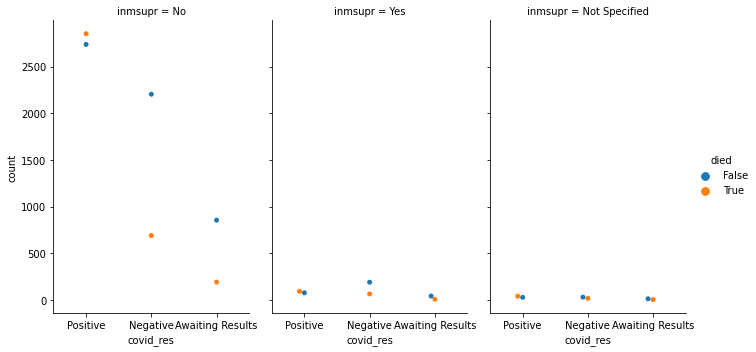

In [45]:

def categorical_df(disease):
    print(icu_yes.groupby(['covid_res', disease, 'died' ])['id'].agg('count'))
    categorical_df = icu_yes.groupby(['covid_res',disease,'died'])['id'].agg('count').to_frame(name='count').rename(columns={'id':'count'}).reset_index().sort_values(by='count',ascending=False)    
    return categorical_df

disease = categorical_df('inmsupr')
sns.catplot(x="covid_res", y="count", hue="died", col='inmsupr',aspect=.65, kind="swarm", data=disease)

Insights:

* If you have an autoimmune disorder, you probably take medicine to manage your condition. Some of those drugs can raise your chances of getting an infection. That might include COVID-19, the disease caused by the new coronavirus. And medicines called immunosuppressants may make you more likely to have serious complications from the virus, as can your autoimmune disorder itself.

But you shouldn’t stop taking your medicine on your own. Instead, talk to your doctor about your concerns and whether you should adjust your treatment.

* Let us look at ICU patients whose covid results were positive, negative and awaiting results.

* There were 10112 ICU patients. 5822 patients are COVID +, 3187 patients are COVID- and 1103 patients are awaiting results.

* As per 2nd graph, patients who took immunosupressant and were COVID positive is very low

* As per 1st graph, patients who did not take immunosupressants and were COVID positive is very high.

* As per the analysis we can conclude immunosuppressants did not play a role here.

* So, we can dismiss this as a side-reason for needing a ICU. 

In [46]:
# Create dimensions
other_disease_dim = go.parcats.Dimension(values=icu_yes.other_disease, categoryorder='category descending', label="Any Other Diseases")
contact_dim = go.parcats.Dimension(values=icu_yes.contact_other_covid, categoryorder='category descending',label="Contact Other Covid Patients")
survival_dim = go.parcats.Dimension(values=icu_yes.died, categoryorder='category descending',label="Died" )

In [47]:

# Create parcats trace
color = icu_yes.died;
colorscale = [[0, 'olive'], [0.13, 'violet'], [0.23, 'deeppink'],[0.33, 'firebrick'], [0.66, 'turquoise'], [0.66, 'seagreen'], [1.0, 'powderblue']]#[[0, 'lightsteelblue'], [1, 'firebrick']];

In [48]:
fig = go.Figure(data = [go.Parcats(dimensions=[other_disease_dim, contact_dim, survival_dim],
        line={'color': color, 'colorscale': colorscale},
        hoveron='color', hoverinfo='count+probability',
        labelfont={'size': 22, 'family': 'Raleway'},
        tickfont={'size': 18, 'family': 'Raleway'},
        arrangement='freeform')])

fig.show()

Insights:

* Around 628 patients who died had a contact with other covid patients, but no other diseases.

* Around 2139 patients who died had no contact with other covid patients and also no other diseases. 

#Analysis of Covid Results across gender

In [49]:
gender_df=icu_yes.groupby(['sex','covid_res']).agg('count')['id'].to_frame(name='count').reset_index()
gender_male=gender_df.loc[gender_df['sex']=='Male']
gender_female=gender_df.loc[gender_df['sex']=='Female']

male=go.Bar(x=gender_male['covid_res'],y=gender_male['count'],marker=dict(color='brown'),name="male")
female=go.Bar(x=gender_female['covid_res'],y=gender_female['count'],marker=dict(color='orange'),name="female")
data=[male,female]

fig = go.Figure(data)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title="Covid Results - Gender (Jan-Jun 2020)",title_x=0.5,xaxis=dict(title="Covid Results"),yaxis=dict(title="Count"),
                   barmode="group")
fig.show()

Insights:

* Let us look at ICU patients whose covid results were positive, negative and awaiting results.
* There were 10112 ICU patients. 5822 patients are COVID +, 3187 patients are COVID- and 1103 patients are awaiting results.

* COVID +ve --> Male = 3905, Female = 1917 (Around 49%)
COVID -ve --> Male = 1899, Female = 1288 (Around 67%)
* There are more male patients than female patients who are positive.
We cannot conclude that men are more susceptible right away.

* In some cultures, men work outside and women are encouraged to work indoors or stay at home.

#Analysis of age across age-frequency, gender

In [50]:
male_hist_data = icu_yes[icu_yes['sex']=='Male']['age']
female_hist_data = icu_yes[icu_yes['sex']=='Female']['age']
group_labels = ['Male','Female'] 

hist_data = [male_hist_data, female_hist_data]
fig=go.Figure()
fig=ff.create_distplot(hist_data, group_labels,bin_size=12)
fig.update_layout(title_text="Distribution of Age - Gender wise",title_x=0.5)
fig.show()

Insights:

* In age range between [0-11],[12-23],[24-35] years, the female patients who needed ICU are more than the male patients who needed ICU.

* In age ranges between [35 - 70] years, the male patients who needed ICU is more than the female patients who needed ICU.

* In age ranges between [71-onwards], the female patients need ICU more than male patients. 

In [51]:
temp = pd.DataFrame({'age_freq':icu_yes.age_freq.value_counts()})
df = temp
df = df.sort_values(by='age_freq', ascending=True)
data  = go.Data([
            go.Bar(
              y = df.index,
              x = df.age_freq,
              orientation='h'
        )])
layout = go.Layout(
       
        margin=go.layout.Margin(l=300),
        title = "Number of Patients in various age groups"
)
fig  = go.Figure(data=data, layout=layout)
py.iplot(fig)

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




Insights:

* In age range between [51 - 70] years, the patients who needed ICU is 4130 .

* In age ranges between [31 - 50] years, the patients who needed ICU is 2710.

* In age ranges between [71-onwards], the number is 1690.

* Infants under age two, the number is 652.

* Youth between [18-30] years, the number is 585.

* Children between [2-12] years, the number is 243.

* Teenagers between [13-17] years, the number is 102.

* Combining the analyses, a male patient between 31-70 years is more likely to need and ICU than a female counterpart and the numbers speak so

* A female patient whose age is above 70 or female infants and female children[2-17] years and female youth[18-30] years patients are more likely to need an ICU than male counterparts.


In [52]:
fig = px.parallel_categories(icu_yes, dimensions=['died','covid_res','sex'],
                color="age", color_continuous_scale=px.colors.sequential.Inferno, # Color for Pclass
               labels={'survived_or_not':'Died', 'covid_res':'Covid Result'}) # labeling
fig.update_layout(title="ICU Parallel Categories Diagram ")
fig.show()

Insights:

* 3948 patients out of 10112 ICU patients died. Around 39% of total patients died.

* Out of these 3948 patients, around 767 patients covid results came negative. Either tests were not good enough or their treatment for some other conditions failed.

In [53]:
print(icu_yes['died'].value_counts())
icu_yes.groupby(['died','covid_res','sex']).agg('count')

False    6164
True     3948
Name: died, dtype: int64


id  ...  age_freq
died  covid_res        sex           ...          
False Awaiting Results Female   341  ...       341
                       Male     564  ...       564
      Negative         Female   981  ...       981
                       Male    1439  ...      1439
      Positive         Female  1010  ...      1010
                       Male    1829  ...      1829
True  Awaiting Results Female    66  ...        66
                       Male     132  ...       132
      Negative         Female   307  ...       307
                       Male     460  ...       460
      Positive         Female   907  ...       907
                       Male    2076  ...      2076

[12 rows x 25 columns]

In [54]:
headerColor = 'red'
rowEvenColor = 'lightpink'
rowOddColor = 'skyblue'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>CONDITIONS</b>','<b>YES</b>','<b>NO</b>','<b>HAVING CONDITION AND DIED</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=16)
  ),
  cells=dict(
    values=[
      ['Pneumonia', 'Intubed', 'COPD', 'Asthma', 'Tobacco', 'Immuno Supression taken','Hypertension','Cardiovascular Disease','Obesity','Renal Chronic Disease','Diabetes','Other Diseases'],
      [icu_yes[pne_bool].shape[0], icu_yes[intubed_bool].shape[0], icu_yes[copd_bool].shape[0], icu_yes[asthma_bool].shape[0], icu_yes[tobacco_bool].shape[0], icu_yes[inmsupr_bool].shape[0], icu_yes[hypertension_bool].shape[0], icu_yes[cardiovascular_bool].shape[0], icu_yes[obesity_bool].shape[0],icu_yes[renal_chronic_bool].shape[0],icu_yes[diabetes_bool].shape[0], icu_yes[other_disease_bool].shape[0]] ,
      [icu_yes[~pne_bool].shape[0], icu_yes[~intubed_bool].shape[0], icu_yes[~copd_bool].shape[0], icu_yes[~asthma_bool].shape[0], icu_yes[~tobacco_bool].shape[0], icu_yes[~inmsupr_bool].shape[0], icu_yes[~hypertension_bool].shape[0],icu_yes[~cardiovascular_bool].shape[0], icu_yes[~obesity_bool].shape[0], icu_yes[~renal_chronic_bool].shape[0], icu_yes[~diabetes_bool].shape[0], icu_yes[~other_disease_bool].shape[0]  ],
      [icu_yes[pne_bool & died_bool].shape[0], icu_yes[intubed_bool & died_bool].shape[0], icu_yes[copd_bool & died_bool].shape[0], icu_yes[asthma_bool & died_bool].shape[0], icu_yes[tobacco_bool & died_bool].shape[0], icu_yes[inmsupr_bool & died_bool].shape[0], icu_yes[hypertension_bool & died_bool].shape[0], icu_yes[cardiovascular_bool & died_bool].shape[0], icu_yes[obesity_bool & died_bool].shape[0],icu_yes[renal_chronic_bool & died_bool].shape[0],icu_yes[diabetes_bool & died_bool].shape[0], icu_yes[other_disease_bool & died_bool].shape[0]   ]   ],
      line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor,rowEvenColor]*5],
    align = ['left', 'center'],
    font = dict(color = 'black', size = 14)
    ))
])

fig.show()

Insights:

* 'YES' column indicates the number of patients having the specified condition, while the last column indicates the number of patients who were having the specified condition and succumbed.

* It is likely patients have one or more diseases or pre-conditions.

In [55]:
print("="* 90)
preg_df = icu_yes[sex_bool & preg_bool]
non_preg_df = icu_yes[sex_bool & ~preg_bool]
print("Women who needed ICU, pregnant is {} ".format(preg_df.shape[0]))
print("Women who needed ICU, non pregnant is {} ".format(icu_yes[sex_bool & ~preg_bool].shape[0]))

Women who needed ICU, pregnant is 74 
Women who needed ICU, non pregnant is 3538 


Insights:

* There are 74 pregnant female patients out of total 3600+ female patients.